In [0]:
import numpy as np
import scipy.io
from matplotlib import pyplot as plt
import scipy.fftpack as ff
from scipy import special

In [0]:
def downsample(array,rate):
    return array[::rate]

def upsample(array,rate):
    from numpy import zeros
    ret =  zeros(rate*len(array))
    ret[::rate] = array 
    return ret

In [0]:
def rcosfir(roff,N_T,T):
  # coss levantado obedece a seguinte funcao                                    h(t) = SINC(t/T) COS(pi R t/T)/(1 - 4 R^2 t^2 /T^2)
  a=N_T*T                                                                       #valor maximo a ser plotdo
  t = np.arange(-a,a,N_T/2)                                                     #eixo tempo
  peso = 1 - (4*(roff**2)*(t**2)/(T**2))
  
  for item in range(len(peso)):                                                 #for utilizado para impedir divisao por 0 (sandwich)
    if peso[item] == 0:                                    
      peso[item]=(peso[item-1]+peso[item+1])/2                                         
  h = np.sinc(t/T)*np.cos(np.pi*roff*t/T)/peso                                  #funcao do cos levantado no tempo
  return h,t

In [0]:
def eye(yrcossAll,t):
  a=int(np.floor(len(yrcossAll)/len(t)))                                        #numero de iterações
  plt.figure(figsize=(10,3))
  for i in range(a):                                                            #for utilizado para plotar cada diagrama do olho                                                     #
    plt.plot(t,yrcossAll[i*len(t):(i+1)*len(t)],'k.')                                #plotando diferentes valores de yrcossall para um msm periodo de tempo
  plt.title('Diagrama do Olho')                                                 #titulo do plot
  plt.show()  

# Prática 1: Diagrama de olho para sinais limitados em banda

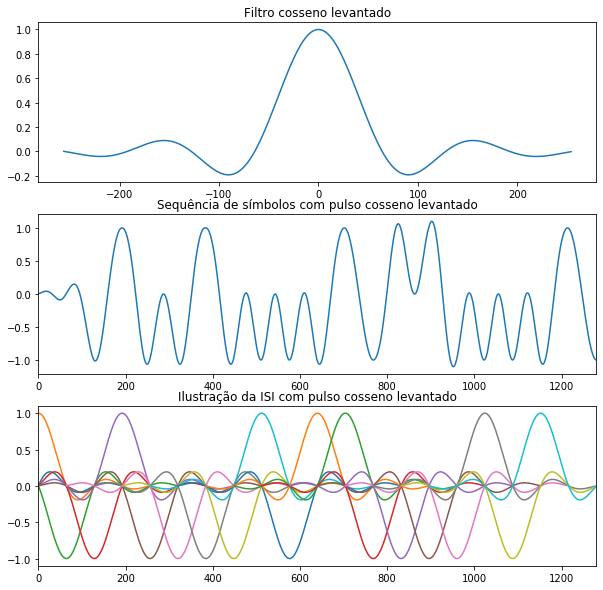

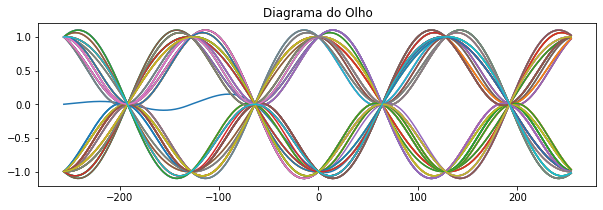

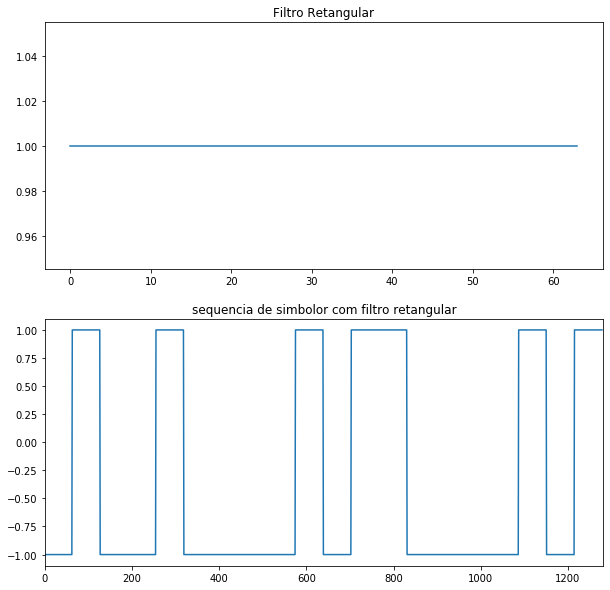

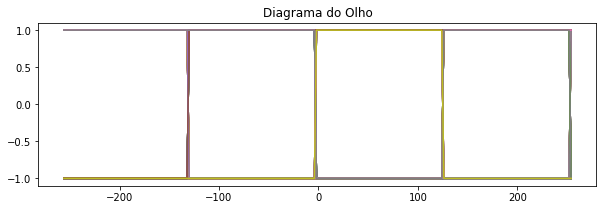

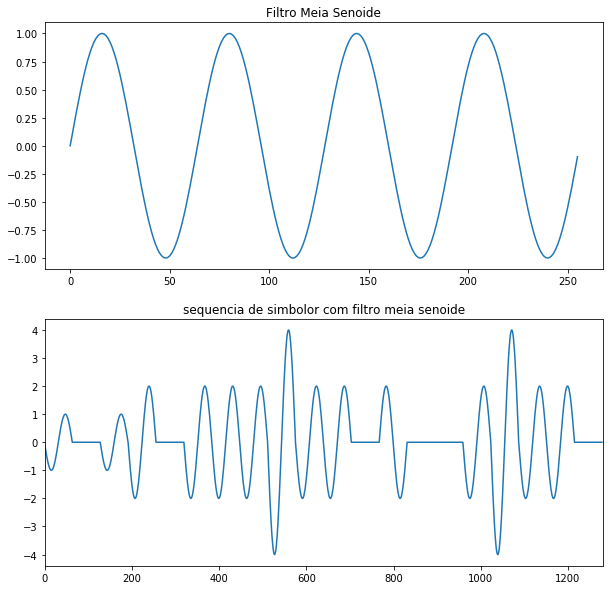

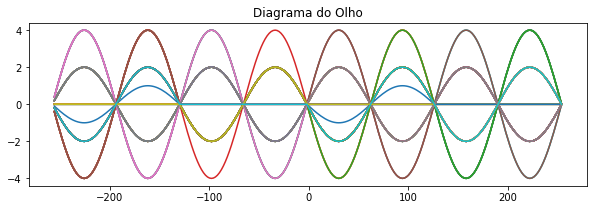

In [0]:
peSim = 64                                        # Período do símbolo (amostras/símbolo)
nsCL = 4                                          # Número de símbolos o cosseno levantado se espalhará (ISI)
roff = 0.25                                       # Fator de decaimento do cosseno levantado
nSimbs = 1                                        # Número de símbolos transmitidos
peSim = 64                                        # Período do símbolo (amostras/símbolo)
nSimbs = 400                                      # Número de símbolos transmitidos 
vtSim = 2*np.random.randint(0,2,nSimbs)-1         # Símbolos
dup = upsample(vtSim,peSim)                       # Símbolos (sobreamostragem)
[hrc,t] = rcosfir(roff, nsCL, peSim)              #funcao cosfir
hrc = hrc #+ 0.1*np.random.randn(len(hrc))    
yrcossAll = np.convolve(dup,hrc)                  #simbolos transmitidos com o cosseno levantado
yrcos = yrcossAll[2*nsCL*peSim:-2*nsCL*peSim+1] #trem de pulsos coss levantado
nSim2Plot = 20                                    # Número de símbolos para o gráfico no tempo

###### plotando graficos do coss levantado #####################################

plt.figure(figsize=(10,10))

plt.subplot(3,1,1)
plt.plot(t,hrc)
plt.title('Filtro cosseno levantado')

plt.subplot(3,1,2)
plt.title('Sequência de símbolos com pulso cosseno levantado')
plt.plot(yrcossAll[1:nSim2Plot*peSim])
plt.xlim(left=0, right=peSim*nSim2Plot)

plt.subplot(3,1,3)
plt.title('Ilustração da ISI com pulso cosseno levantado')
for ik in range(nSim2Plot):
  plt.plot(t + (ik-1)*peSim,vtSim[ik]*hrc)
  plt.xlim(left=0, right=peSim*nSim2Plot)
plt.show()

eye(yrcossAll,t)

#################pulso retangular###############################################
hT = np.ones((peSim))                                                           #Filtro retangular
ynrzAll = np.convolve(hT,dup)                                                   #Símbolos transmitidos com pulso retangular
ynrz = ynrzAll[1:-peSim+1]                                                      #retira o último símbolo  

plt.figure(figsize=(10,10))

plt.subplot(2,1,1)
plt.title('Filtro Retangular')
plt.plot(hT)

plt.subplot(2,1,2)
plt.title('sequencia de simbolor com filtro retangular')
plt.plot(ynrzAll[1:nSim2Plot*peSim])
plt.xlim(left=0, right=peSim*nSim2Plot)

eye(ynrz,t)

###################pulso meia senoide##########################################
hSin = np.sin(np.pi*t/peSim)                                                    #Pulso meia senoide
ysinAll = np.convolve(dup,hSin)                                                 #Símbolos transmitidos com pulso meia senoide
ysin = ysinAll[1:-peSim+1]                                                      #retira o último símbolo  

plt.figure(figsize=(10,10))

plt.subplot(2,1,1)
plt.title('Filtro Meia Senoide')
plt.plot(hSin)

plt.subplot(2,1,2)
plt.title('sequencia de simbolor com filtro meia senoide')
plt.plot(ysinAll[1:nSim2Plot*peSim])
plt.xlim(left=0, right=peSim*nSim2Plot)

eye(ysin,t)

### Parte 2

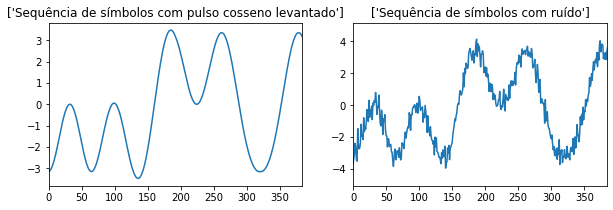

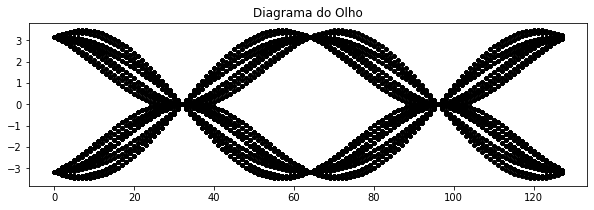

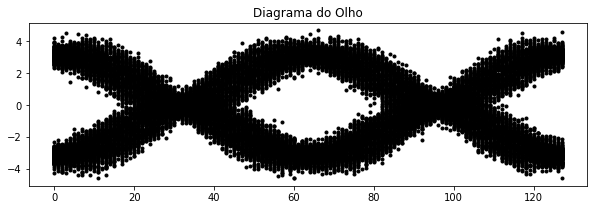

In [0]:
peSim = 64                                                                      # Período do símbolo (amostras/símbolo)
nsCL = 4                                                                        # Número de símbolos o cosseno levantado se espalhará (ISI)
EbNo_dB = 30                                                                    #b/No da simulação (somente um valor)
T = 0.1                                                                         # Tempo de símbolo (duração do símbolo em seg/símbolo)
Ts = T /(64)                                                                    # Tempo de amostragem do pulso (amostras/seg)
roff = 0.25                                                                     # Fator de decaimento do cosseno levantado
peSim = 64                                                                      # Período do símbolo (amostras/símbolo)
nSimbs = 400                                                                    # Número de símbolos transmitidos 
vtSim = 2*np.random.randint(0,2,nSimbs)-1                                       # Símbolos
dup = upsample(vtSim,peSim)                                                     # Símbolos (sobreamostragem)
[hrc,t] = rcosfir(roff, nsCL, peSim)                                            #funcao cosfir   
#
hrc = np.sqrt(1/T)*hrc
yrcossAll = np.convolve(hrc,dup)                                                #simbolos transmitidos com o cosseno levantado
yrcos = yrcossAll[2*nsCL*peSim:-2*nsCL*peSim+1]                                 #trem de pulsos coss levantado
## AWGN
Eb = np.sum(np.matmul(hrc,np.transpose(hrc)))#/len(hrc)                         #energia de bit
No = Eb/EbNo                                                                    #energia do ruido
vtN = np.sqrt(No/2)*np.random.randn(len(yrcossAll))                             #vetor de ruido AWGN

# Sinal recebido com ruído AWGN

yrcossAlln = yrcossAll + vtN                                                    #adicionando ruido  
yrcosn = yrcos + vtN[2*nsCL*peSim:-2*nsCL*peSim+1]                              #adicionando ruido        
plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
plt.plot(yrcos)
plt.title(['Sequência de símbolos com pulso cosseno levantado'])
plt.xlim(left=0, right=peSim*6)
plt.subplot(1,2,2)
plt.plot(yrcosn)
plt.title(['Sequência de símbolos com ruído'])
plt.xlim(left=0, right=peSim*6)

t = np.arange(0,2*peSim,1)                                                      #eixo X do diagrama do olho

eye(yrcos,t)
eye(yrcosn,t)

# Pratica 02

0.07071067811865475


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:48: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


Text(0.5, 0, 'Tempo [s]')

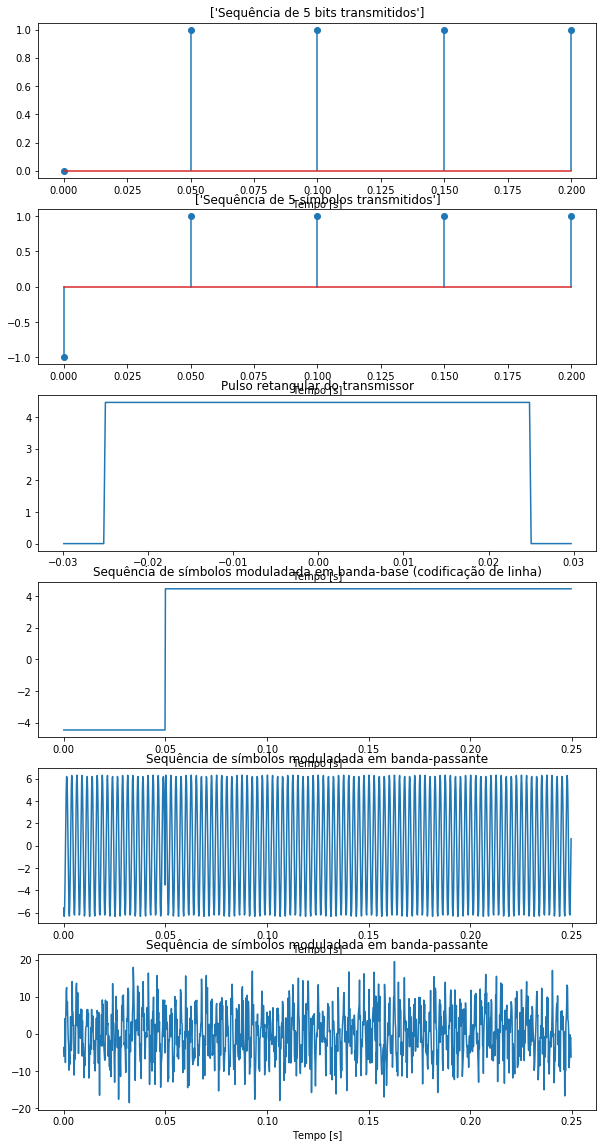

In [0]:
EbNo_dB = 20                                                                    #Eb/No da simulação (somente um valor)
EbNo = 10**(EbNo_dB/10)                                                          #Eb/No em escala linear
############## Transmitir 1 quadro de Na bits com nSamp amostras#################
Na = 1000                                                                       #Número de bits por quadro
nAmoSim = 256                                                                   #Número de amostras por símbolo 
T = 0.05                                                                        #Tempo de símbolo (duração do símbolo em seg/símbolo)
Ts = T / nAmoSim                                                                #Tempo de amostragem do pulso (amostras/seg)
Ns = Na * nAmoSim                                                               #Número de amostras
t = np.array([range(Ns)])
t = (t-1)*Ts                                                                 #Eixo do tempo 

###################### Transmissor #########################################
vtSimbolos = np.array([-1,1])                                                   #Símbolos (BPSK)
vtBin = np.random.randint(0,2,Na)                                                 #Vetor com bits
 #########################Energia do bit########################################
Eb = np.sum(np.matmul(vtSimbolos,np.transpose(vtSimbolos)))/len(vtSimbolos)
vtTxSim = vtSimbolos[vtBin]
                                            #Mapeamento bit para símbolo
                                                    
############ Codificação de linha (modulação em banda-base)#####################
hT = 1/np.sqrt(T)*np.ones((nAmoSim))                                            #Pulso retangular do transmissor (NRZ)
############Aplicando o pulso a sequência de símbolos########################### 
vtTxBB = np.convolve(upsample(vtTxSim, nAmoSim), hT)        
vtTxBB = vtTxBB[range(Ns)]                                                      #Truncando para o número de amostras original 
#############Modulação em banda-passante########################################
fc = 400                                                                        #Frequência da portadora [Hz]
vtTxBP = vtTxBB *np.sqrt(2)*np.cos(2*np.pi*fc*t)                                #Modulator (portadora de potência 1)
 #################Canal AWGN ###################################################
No = Eb/EbNo
print(np.sqrt(No/2))
#################### Sinal recebido#############################################
vtRxBP = vtTxBP + np.sqrt(1/Ts*No/2)*np.random.randn(len(vtTxBB)) 
###################Grááficos####################################################

nPontos = 5                                                                     # Plotar somente os nPontos iniciais

plt.figure(figsize=(10,20))
# Bits
plt.subplot(6,1,1);
tBits = np.arange(0,nPontos,1)*Ts*nAmoSim
plt.title(['Sequência de '+str(nPontos)+' bits transmitidos'])
plt.xlabel('Tempo [s]')
plt.stem(tBits, vtBin[range(nPontos)],use_line_collection=True)

#Simbolos
plt.subplot(6,1,2)
tSim = np.arange(0,nPontos,1)*Ts*nAmoSim
plt.stem(tSim,vtTxSim[range(nPontos)])
plt.title(['Sequência de '+str(nPontos)+' símbolos transmitidos'])
plt.xlabel('Tempo [s]')

#retangulo
plt.subplot(6,1,3)
hT1=np.zeros(len(hT)+50)
t=np.arange(-nAmoSim/2-25,nAmoSim/2+25,1)*Ts
hT1[25:-25]=hT
plt.plot(t,hT1)
plt.title('Pulso retangular do transmissor')
plt.xlabel('Tempo [s]')
#Codificador de linha (modulação em banda-base)
plt.subplot(6,1,4);
tMod = np.arange(0,nPontos*nAmoSim-1)*Ts
plt.plot(tMod,vtTxBB[np.arange(0,nPontos*nAmoSim-1)])
plt.title('Sequência de símbolos moduladada em banda-base (codificação de linha)')
plt.xlabel('Tempo [s]')

# Modulador em banda-passante
plt.subplot(6,1,5)
plt.plot(tMod,vtTxBP[0,0:len(tMod)])
plt.title('Sequência de símbolos moduladada em banda-passante')
plt.xlabel('Tempo [s]')

# Receptor em banda-passante
plt.subplot(6,1,6)
plt.plot(tMod,vtRxBP[0,0:len(tMod)])
plt.title('Sequência de símbolos moduladada em banda-passante')
plt.xlabel('Tempo [s]')

### Parte 2

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


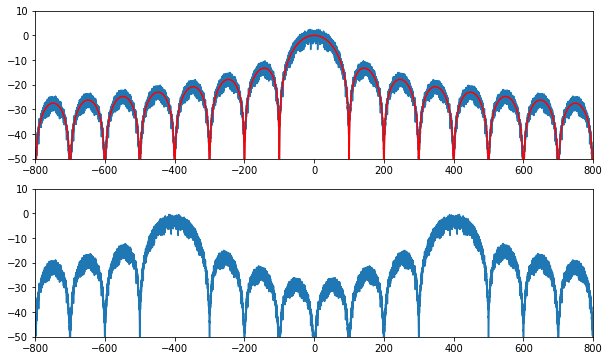

In [0]:
EbNo_dB = 20                                                                    #Eb/No da simulação (somente um valor)
EbNo = 10**(EbNo_dB/10)                                                         #Eb/No em escala linear
# Transmitir Nf quadros de Na bits com nSamp amostras
Nf = 10                                                                         #Número de quadros a simular
Na = 1000                                                                       #Número de bits por quadro
nAmoSim = 128                                                                   #Número de amostras por símbolo
T = 0.01                                                                        #Tempo de símbolo (duração do símbolo em seg/símbolo)
Ts = T / nAmoSim                                                                #Tempo de amostragem do pulso (amostras/seg)
Ns = Na * nAmoSim                                                               #Número de amostras
fc = 400                                                                        #Frequência da portadora [Hz] - modulação em banda-passante
t = np.arange(0,Ns-1)*Ts                                                        #Eixo do tempo
vtPSDSimBB = np.zeros((Ns-1))                                                   #Vetor com a PSD simulada (estimada nos Nf quadros)-Banda-base
vtPSDSimBP = np.zeros((Ns-1))                                                   #Vetor com a PSD simulada (estimada nos Nf quadros)-Banda-passante
#
#Transmissor
vtSimbolos = np.array((1,-1))                                                   #simbolo BPSK
 
for i in range(Nf):
  vtBin = np.random.randint(0,2,Na)                                             #vetor com bits
  #Energia do bit
  vtSimbolost = np.transpose(vtSimbolos)
  Eb = np.sum(vtSimbolos*vtSimbolost) / len(vtSimbolos)
  vtTxSim = vtSimbolos[vtBin]                                                   #Mapeamento bit para símbolo
  hT = 1/np.sqrt(T)*np.ones((nAmoSim))                                          #Pulso retangular do transmissor (NRZ)
  vtTxBB = np.convolve(upsample(vtTxSim,nAmoSim),hT)
  vtTxBB = vtTxBB[1:Ns]                                                         #truncando para o numero de amostras original
  vtTxBP = vtTxBB*np.sqrt(2)*np.cos(2*np.pi*fc*t)
  #stimação da PSD via fft (sinal em banda-base)
  vtSpecBB = ff.fftshift(ff.fft(vtTxBB))
  #PSD do sinal em banda-base
  vtSpecBBcon = np.conj(vtSpecBB)
  vtPSDSimBB = vtPSDSimBB + vtSpecBBcon*vtSpecBB*Ts/Ns
  #Calcula a estimativa da PSD do sinal em banda-passante
  vtSpecBP = ff.fftshift(ff.fft(vtTxBP))
  vtSpecBPcon = np.conj(vtSpecBP)
    #PSD do sinal em banda-passante
  vtPSDSimBP = vtPSDSimBP + vtSpecBPcon*vtSpecBP*Ts/Ns
## plotando os graficos
xFreq = np.arange(-1/(2*Ts),(1/(2*Ts))-1/(Ns*Ts),1/(Ns*Ts))
VfTheo = (1/np.sqrt(T))*(T*np.sinc(T*xFreq))
PSDTheo = VfTheo**2/T

plt.figure(figsize=(10,6))

plt.subplot(2,1,1)
plt.plot(xFreq,10*np.log10(vtPSDSimBB/Nf))
plt.plot(xFreq,10*np.log10(PSDTheo),'r')
plt.ylim(bottom=-50,top=10)
plt.xlim(left=-800,right=800)

plt.subplot(2,1,2)

plt.plot(xFreq,10*np.log10(vtPSDSimBP/Nf))
plt.ylim(bottom=-50,top=10)
plt.xlim(left=-800,right=800)
plt.show()

### Parte 3

Rodando Eb/No = -10 dB
Rodando Eb/No = -8 dB
Rodando Eb/No = -6 dB
Rodando Eb/No = -4 dB
Rodando Eb/No = -2 dB
Rodando Eb/No = 0 dB
Rodando Eb/No = 2 dB
Rodando Eb/No = 4 dB
Rodando Eb/No = 6 dB
Rodando Eb/No = 8 dB


Text(0, 0.5, 'BER')

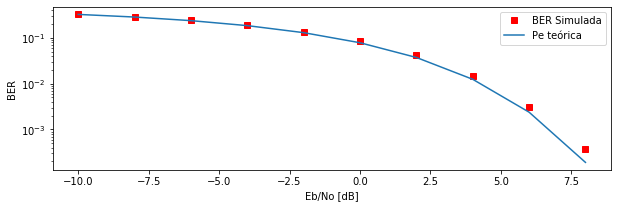

In [0]:
vtEbNodB = np.arange(-10,10,2)                                                           #Eb/No da simulação (somente um valor)
vtEbNo = 10**(vtEbNodB/10)                                                      #Eb/No em escala linear
##### Transmitir Nf quadros de Na bits com nSamp amostras####################
Nf = 100
Na = 1000                                                                       #Número de bits por quadro
nAmoSim = 128                                                                   #Número de amostras por símbolo
T = 0.01                                                                        #Tempo de símbolo (duração do símbolo em seg/símbolo)
Ts = T / nAmoSim                                                                #Tempo de amostragem do pulso (amostras/seg)
Ns = Na * nAmoSim                                                               #Número de amostras
fc = 400                                                                        #Frequência da portadora [Hz] - modulação em banda-passante
t = np.arange(0,Ns-1)*Ts                                                        #Eixo do tempo
###### Pulso (retangular) da modulação em banda-base (codificação de linha)###
hT = 1/np.sqrt(T)*np.ones((nAmoSim,1))                                               #Pulso retangular do transmissor (NRZ)
###########Pulso do filtro casado do receptor#################################
hR = np.fliplr(hT)
##################Transmissor###################################################
vtSimbolos = np.array((-1,1))                                                   #simbolo BPSK
##Energia do bit
vtSimbolost = np.transpose(vtSimbolos)
Eb = sum(vtSimbolos*vtSimbolost) / len(vtSimbolos) 
vtBER = np.zeros((len(vtEbNo)))
vtPe = np.zeros((len(vtEbNo)))
for i in range(len(vtEbNo)):
  print('Rodando Eb/No = ' + str(vtEbNodB[i]) + ' dB')
  nErrs = 0
  No = Eb/vtEbNo[i]
  for ni in range(Nf):
    vtBin = np.random.randint(0,2,Na)                                           #Vetor com bits
    vtTxSim = vtSimbolos[vtBin]                                                 #Mapeamento bit para símbolo
  ##### Modulação em banda-base################################################
  #####Aplicando o pulso a sequência de símbolos (sinal em banda-base)#########
    vtTxBB = np.convolve(upsample(vtTxSim, nAmoSim), hT[:,0])
    vtTxBB = vtTxBB[1:Ns]                                                       #Truncando para o número de amostras original
####### Modulação em banda-passante (portadora com potência 1)##################
    vtTxBP = vtTxBB * np.sqrt(2) * np.cos(2*np.pi*fc*t);
#
############## Sinal recebido (anal AWGN)#######################################
    vtRxBP =  vtTxBP + np.sqrt(1/Ts*No/2)*np.random.randn(len(vtTxBP))
    #
 ################## Receptor####################################################
    vtBB = vtRxBP* np.sqrt(2)*np.cos(2*np.pi*fc*t)                                       #Demodulador banda-passante
    vtFC = np.convolve(vtBB, hR[:,0]) * Ts                                           #Filtro Casado (demodulação em banda-base)
    r = vtFC[np.arange(1,Na)*nAmoSim]                                                    #Downsample (amostragem antes do decisor)
    vtBinRec = (r > 0.0)                                                        #Decisor BPSK
    ### Contagem de erros #####################################################
    nErrs = nErrs + sum(np.logical_xor(vtBin[0:-2], vtBinRec[0:-1]))
  vtBER[i] = nErrs/(Na*Nf)
  vtPe[i] = (1/2)*special.erfc(np.sqrt(vtEbNo[i]))
plt.figure(figsize=(10,3))
plt.semilogy(vtEbNodB, vtBER, 'sr')
plt.semilogy(vtEbNodB, vtPe)
plt.legend(['BER Simulada','Pe teórica'])
plt.xlabel('Eb/No [dB]')
plt.ylabel('BER')